In [16]:
from mmseg.apis import init_model,inference_model, show_result_pyplot
import sys
import os
import matplotlib.pyplot as plt
mmseg_path = "../../submodules/mmsegmentation/"
sys.path.append(mmseg_path)

In [17]:
#create a dictionary of configurations and their respective checkpoints
configs = [
    {
        "config_name":"unet-s5-d16_deeplabv3_4xb4-40k_DME-64x64.py",
        "checkpoint":"deeplabv3_unet_s5-d16_64x64_40k_drive_20201226_094047-0671ff20.pth"
    },
    {
        "config_name":"unet-s5-d16_deeplabv3_4xb4-ce-1.0-dice-3.0-40k_DME-64x64.py",
        "checkpoint":"deeplabv3_unet_s5-d16_ce-1.0-dice-3.0_64x64_40k_drive_20211210_201825-6bf0efd7.pth"
    },
    {
        "config_name": "unet-s5-d16_fcn_4xb4-40k_DME-64x64.py",
        "checkpoint": "fcn_unet_s5-d16_64x64_40k_drive_20201223_191051-5daf6d3b.pth"
    },
    {
        "config_name": "unet-s5-d16_fcn_4xb4-ce-1.0-dice-3.0-40k_DME-64x64.py",
        "checkpoint":"fcn_unet_s5-d16_ce-1.0-dice-3.0_64x64_40k_drive_20211210_201820-785de5c2.pth"
    },
    {
        "config_name":"unet-s5-d16_pspnet_4xb4-40k_DME-64x64.py",
        "checkpoint":"pspnet_unet_s5-d16_64x64_40k_drive_20201227_181818-aac73387.pth"
    },
    {
        "config_name":"unet-s5-d16_pspnet_4xb4-ce-1.0-dice-3.0-40k_DME-64x64.py",
        "checkpoint":"pspnet_unet_s5-d16_ce-1.0-dice-3.0_64x64_40k_drive_20211210_201821-22b3e3ba.pth"
    }
]

In [18]:
#initialize the configuration file
config_idx = 0
previous_model = False
pretrained_model = True
checkpoint_iters = 8000
checkpoint_name = "iter_{}.pth".format(checkpoint_iters)
config_folder = "ece661"
config_name = configs[config_idx]["config_name"]
cfg_path = os.path.join(mmseg_path,"configs",config_folder,config_name)

if previous_model:
    #set the checkpoint to load from - for pre-trained models
    work_dir = os.path.join(mmseg_path,'work_dirs',"{}_test_pretrained".format(config_name))
    checkpoint_name = configs[config_idx]["checkpoint"]
    checkpoint_path = os.path.join(mmseg_path,'checkpoints',checkpoint_name)
elif pretrained_model:
    #load checkpoint - for fine-tuned models
    work_dir = os.path.join(mmseg_path,'work_dirs',config_name)
    checkpoint_path = os.path.join(work_dir,checkpoint_name)
else:
    #load checkpoint - for training from scratch
    work_dir = os.path.join(mmseg_path,'work_dirs',"{}_no_pretrained".format(config_name))
    checkpoint_path = os.path.join(work_dir,checkpoint_name)

#build the model
model = init_model(cfg_path,checkpoint_path)

Loads checkpoint by local backend from path: ../../submodules/mmsegmentation/work_dirs/unet-s5-d16_deeplabv3_4xb4-40k_DME-64x64.py/iter_8000.pth


/home/david/Documents/ECE661_mmSeg/submodules/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/home/david/Documents/ECE661_mmSeg/submodules/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/david/Documents/ECE661_mmSeg/submodules/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:249: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


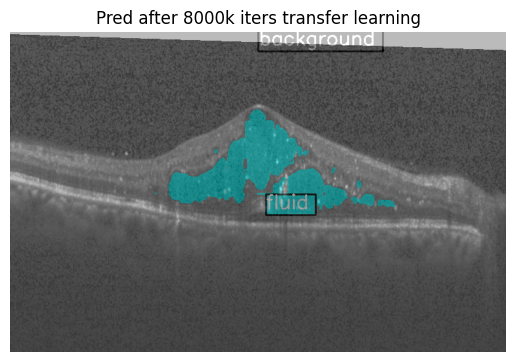

In [19]:
img_idx = 5
img = "000{}.png".format(img_idx)

#dataset path
dataset_path = "/data/david/DME/images/validation/"
img_path = os.path.join(dataset_path,img)

#mask path
ann = "000{}_manual1.png".format(img_idx)
ann_dataset_path = "/data/david/DME/annotations/validation/"
ann_path = os.path.join(ann_dataset_path,ann)

result = inference_model(model,img_path)

save_path = os.path.join(work_dir,img)
vis_image = show_result_pyplot(model,img_path,result,out_file=save_path)

plt.imshow(vis_image)
if previous_model:
    save_name = "pred_TL_0k_iters.png"
    title = "Pred after 0k iters transfer learning"
elif pretrained_model:
    save_name = "pred_TL_{}k_iters.png".format(checkpoint_iters)
    title = "Pred after {}k iters transfer learning".format(checkpoint_iters)
else:
    save_name = "pred_no_TL_{}k_iters.png".format(checkpoint_iters)
    title = "Pred after {}k iters without transfer learning".format(checkpoint_iters)
plt.title(title)
plt.axis("off")
save_path = os.path.join(work_dir,save_name)
plt.savefig(save_path)

shape:(496, 768, 3), min:0, max:255
shape:(496, 768), min:0, max:1


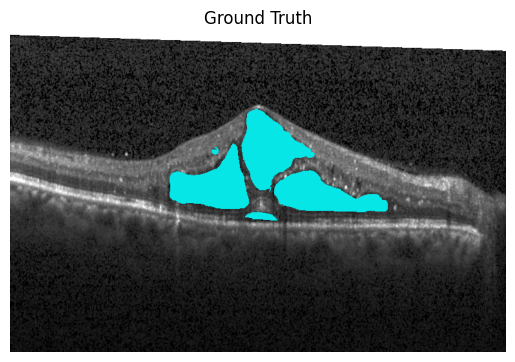

In [20]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

# Load the image as an array
img = imageio.v3.imread(img_path)
img = np.repeat(img[:, :, np.newaxis], 3, axis=2)
print("shape:{}, min:{}, max:{}".format(img.shape,img.min(),img.max()))

#load the annotation
ann = imageio.v3.imread(ann_path)
print("shape:{}, min:{}, max:{}".format(ann.shape,ann.min(),ann.max()))

pallet = [6, 230, 230]
fluid_cells = ann == 1
img[fluid_cells,:] = pallet

# Plot the image
plt.imshow(img)
plt.title("Ground Truth")
plt.axis("off")
plt.savefig("000{}.png".format(img_idx))
